# Проект "Анализ исторических данных с построением прогноза продаж"

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Исследование необходимо для проверки популярности продукта и планирования рекламных компаний.

## Изучение предоставленных данных

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#загрузка файла
try:
    data = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/game-sales-analysis/main/games.csv')
except FileNotFoundError:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
#знакомство с информацией
def data_info(data):
    display(data.head(20)), data.info(), display(data.describe()), print(data.duplicated().sum())
data_info(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


0


В представленных данных 16715 строк. Имеются пропуски, отсутствуют явные дубликаты. Данные читаемы, подходят для работы.

Имеется аннотация к данным:
<br>•	**Name** — название игры
<br>•	**Platform** — платформа
<br>•	**Year_of_Release** — год выпуска
<br>•	**Genre** — жанр игры
<br>•	**NA_sales** — продажи в Северной Америке (миллионы проданных копий)
<br>•	**EU_sales** — продажи в Европе (миллионы проданных копий)
<br>•	**JP_sales** — продажи в Японии (миллионы проданных копий)
<br>•	**Other_sales** — продажи в других странах (миллионы проданных копий)
<br>•	**Critic_Score** — оценка критиков (максимум 100)
<br>•	**User_Score** — оценка пользователей (максимум 10)
<br>•	**Rating** — рейтинг от организации ESRB (Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br>Данные за 2016 год могут быть неполными.

## Предобработка данных

В представленном датафрейме столбцы именованы с заглавных букв, есть пропуски, некоторые типы данных не соответствуют значениям. Это неудобно в работе, стоит исправить:

### Изменение стиля написания

In [4]:
#приведение названий к единому стилю написания:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Изменение типов данных

In [5]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Столбец с годом выпуска точно имеет целочисленное значение. В дальнейшем будет происходить группировка данных по годам выпуска, поэтому для удобства чтения и визуального восприятия, стоит заменить тип. Точно также в дальнейшем будет исследоваться пользовательский рейтинг, поэтому необходимо перевести тип данных из строкового значения в числовой.

Замене формата подлежат столбцы year_of_release и user_score. Однако перед заменой необходимо предварительно обработать в них значения во избежание ошибок. Также заменим все float64 на float32 для экономии памяти.

In [6]:
#в столбце year_of_release есть пропуски, они не позволят перевести данные в целочисленный тип. Заменим пока что их на 0:
data['year_of_release'].fillna(value=0, inplace=True)

In [7]:
#в столбце user_score по-видимому есть строковые значения, посмотрим:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score было обнаружено строковое значение 'tbd', мешающее обработке данных. Вероятно, tbd означает to be determined, то есть рейтинг не определен пользователем, пользователь еще не оставил оценку. В таком случае можно заменить пока что это значение на пропуск.

In [8]:
#изменение строкового значения на пропуск
for index in data.query('user_score == "tbd"').index:
    data.loc[index, 'user_score'] = np.nan

In [9]:
#изменение типа столбцов
data = data.astype({'year_of_release':'int', 'user_score':'float'})

In [10]:
#изменение float64 на float32
data_float64 = list(data.select_dtypes(include='float64'))
data[data_float64] = data[data_float64].astype('float32')

### Обработка пропусков

In [11]:
#оценка количества пропусков во всем датасете
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски в столбцах с названием игры и жанром представлены малым количеством строк, их можно спокойно удалить, это не повлияет на результат исследования.  
Пропуски в столбцах с рейтингом пользователей и критиков составляют более 50%, их удаление невозможно. На основании рейтингов будут делаться определенные выводы, поэтому замена пропусков медианным, средним или любым примерным значением может исказить реальную картину. Предлагается оставить пропуски и работать с данными как есть.

Пропуски в столбце с рейтингом от ESRB предлагается заменить категориальным значением UN (Unknown). Это позволит определить пользовательский интерес к играм, не проверенным данной организацией.

Наличие пропусков в колонках с рейтингом - нормальное явление. Пользователи, критики или ESRB просто не оставляли еще оценку той или иной игре, поэтому возникли пропущенные значения.

In [12]:
#удаление пропусков в столбцах name и genre
data.dropna(subset=['name','genre'], inplace=True)

Ранее в столбце year_of_release пропуски были заменены на 0.  
Возможно, пропуски возникли вследствие технической ошибки при выгрузке.  
Необходимо также обработать эти значения:

In [13]:
data.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Имеется 269 значений. В работе необходимо будет исследовать данные по определенным временным промежуткам, поэтому такие значения не подойдут. Их количество мало, можно удалить. Однако заметно, что в названии некоторых игр есть год. Стоит попробовать сохранить строки с этими играми, и подставить в столбец year_of_release год ранее, чем из названия игры (это обусловлено тем, что официальный релиз всегда происходит ранее, чем игра поступает в продажу):

In [14]:
#проверка названий игр с пропусками в годе выпуска
data.query('year_of_release == 0')['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [15]:
#создаем список с годами и переводим в строковый формат для поиска в названиях
years = data['year_of_release'].unique().astype('str').tolist()
years.remove('0')
print(years)

['2006', '1985', '2008', '2009', '1996', '1989', '1984', '2005', '1999', '2007', '2010', '2013', '2004', '1990', '1988', '2002', '2001', '2011', '1998', '2015', '2012', '2014', '1992', '1997', '1993', '1994', '1982', '2016', '2003', '1986', '2000', '1995', '1991', '1981', '1987', '1980', '1983']


In [16]:
#цикл по замене значений:
for year in years: #цикл перебирает значение из списка с годами
    for index in data.query('year_of_release == 0').index: #цикл перебирает индексы из отфильтрованной части датафрейма
        if year in data.loc[index, 'name']:                #условие нахождения значения из списка с годами в названии игры
            data.loc[index, 'year_of_release'] = (int(year) - 1) #присваивание значения из списка с годами

In [17]:
#проверка результата
data.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Получилось заменить небольшое количество значений. Оставшиеся строки можно просто удалить.

In [18]:
#удаление пропусков в столбце с годом выпуска
data.drop(labels = (data.query('year_of_release == 0').index), axis = 0, inplace = True)

In [19]:
#замена пропусков в столбце rating
data['rating'].fillna(value = 'UN', inplace=True)

### Проверка неявных дубликатов

Есть столбцы со строковыми значениями, такие как genre и rating, где небольшое количество значений и могут присуствовать неявные дубликаты (опечатки и тд). Стоит их проверить.

In [20]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [21]:
#проверка столбца rating на уникальные значения
data['rating'].unique()

array(['E', 'UN', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинги E и K-A - одно и то же, до 1998 года игры получали рейтинг K-A (kids to adults), а после 1998 его переименовали в E (everyone). Для точности, необходимо заменить все устаревшие рейтинги K-A на обновленный E:

In [22]:
#находим значение К-А и меняем его на Е
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [23]:
#проверка результата
data['rating'].unique()

array(['E', 'UN', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
#проверка столбца genre на уникальные значения
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В столбце с жанрами дубликатов нет.

### Добавление данных

Для удобства анализа стоит добавить суммарные продажи по всем регионам:

In [25]:
#добавление столбца с суммой продаж по всем регионам.
data.insert(8, 'sum_sales', (data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)), True)

## Исследовательский анализ данных

### Проверка количества игр в разные годы выпуска:

Необходимо определить период, на основании которого будет проводиться аналитика и строиться прогноз по продажам на 2017 год. Для это в первую очередь стоит оценить количество выпущенных игр в разные годы, и первоначально сократить масштаб временного промежутка.

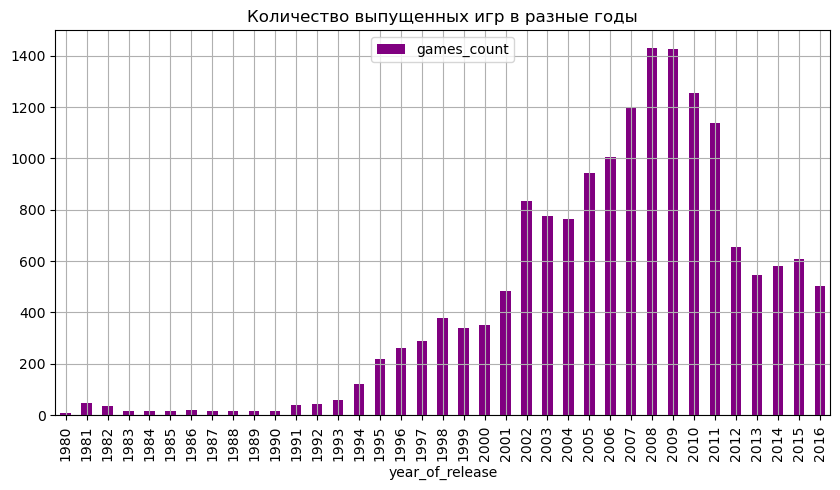

In [26]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count') \
    .plot(kind='bar', color='purple', grid=True, figsize=(10,5));
plt.title('Количество выпущенных игр в разные годы');
plt.legend(['games_count'], loc=9);

На графике наглядно виден активный рост количества выпускаемых игр с 2001 года. Первоначально можно сузить рассматриваемый диапазон с 2001 по 2016, но позднее скорректировать исходя из данных по разным платформам.

### Проверка количества продаж по разным платформам и среднего срока жизни платформы:

Для прогноза продаж также необходимо понимать, на каких платформах заострять внимание, а какие уже устарели и неактуальны. Для этого потребуется оценка количества выпущенных игр по каждой платформе, срок жизни каждой платформы на текущий момент (сколько лет выходили релизы для каждой из платформ), распределение суммы продаж по годам.

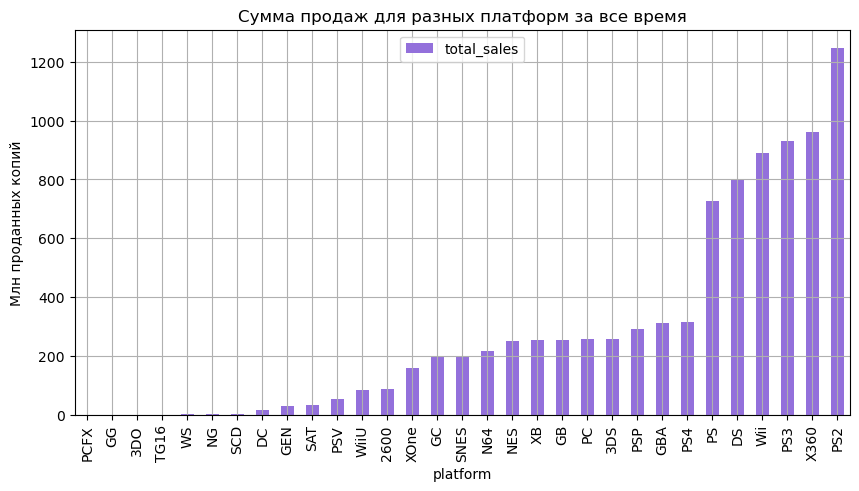

In [27]:
data.groupby('platform')['sum_sales'].agg(sum).sort_values() \
    .plot(kind='bar', color='mediumpurple', figsize=(10,5), grid=True);
plt.title('Сумма продаж для разных платформ за все время');
plt.legend(['total_sales'], loc=9);
plt.ylabel('Млн проданных копий');

Видны 6 платформ с ярко-максимальным количеством выпущенных игр. Сокращать выборку до 6 платформ некорректно, особенно с учетом того, что пик количества выпускаемых игр пришелся не на текущий год (2016), а на 2008-2009, и среди платформ-лидеров могуть быть устаревшие, которые уже становятся неактуальны. А среди платформ с минимальным количеством продаж могут быть "перспективные новички". Поэтому для рассмотрения дальше можно взять топ-25 платформ, понять, какие из них уже практически устарели, а какие набирают обороты в два последних года.

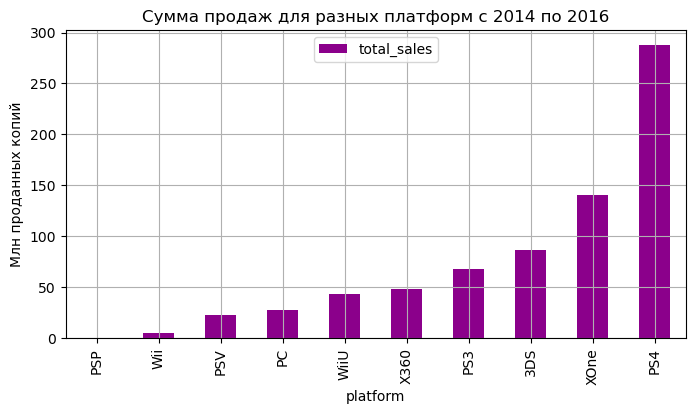

In [28]:
data.query('year_of_release >= 2014').groupby('platform')['sum_sales'].agg('sum').sort_values() \
    .plot(kind='bar', grid=True, figsize=(8,4), color='darkmagenta');
plt.title('Сумма продаж для разных платформ с 2014 по 2016');
plt.legend(['total_sales'], loc=9);
plt.ylabel('Млн проданных копий');

По детализированному графику продаж за последние 2 года видно, что платформы PlayStation 4 и XBox One являются лидерами, хотя на общем распределении их значения продаж были весьма средние. Это означает, что нельзя просто "отрезать" топ-10/15/20 от общего числа продаж, и обязательно в выборке должны быть платформы, аткуальные на текущий момент. Оставим в рассмотрении 9 платформ из 10, актуальных за последние 2 года (PlayStation Portable исключается из-за предельно-малого количества продаж и появления более современной платформы PlayStation Vita)

In [29]:
#сформируем список с названиями топ-9 актуальных платформ
best_platforms_names = data.query('year_of_release >= 2014').groupby('platform')['sum_sales'].agg(sum).sort_values().tail(9).index.tolist()

In [30]:
#сформируем отдельный датафрейм с отфильтрованными платформами в отфильтрованный период.
best_platforms = data.query('platform in @best_platforms_names and year_of_release >= 2001')

Параллельно стоит оценить срок жизни выбранных платформ. Для этого необходимо построить график с количеством лет, когда выпускались игры для каждой платформы, найти среднее предельное значение для платформы и оценить срок жизни актуальных платформ.

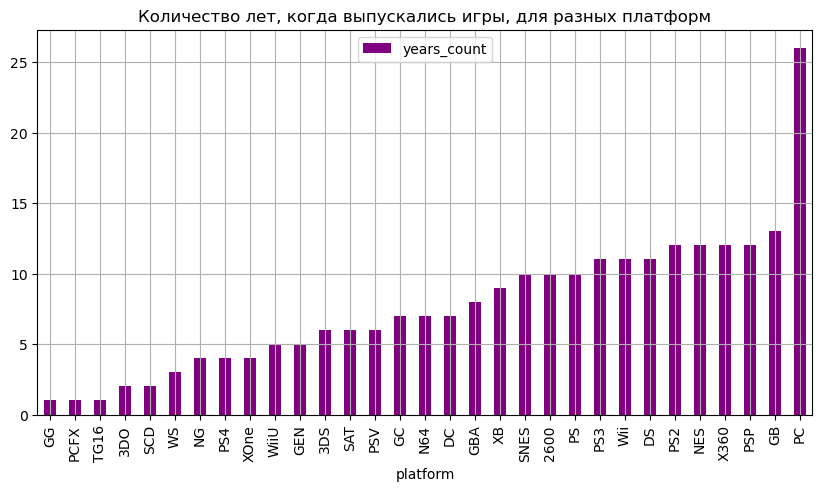

In [31]:
#строим график по сгруппированным данным по платформам с подсчетом количества уникальных значений лет релиза игр,...
#...таким образом получаем, сколько лет выпускались игры для платформы
data.groupby('platform').year_of_release.nunique().sort_values().plot(kind='bar', color='purple', grid=True, figsize=(10,5));
plt.legend(['years_count'], loc=9);
plt.title('Количество лет, когда выпускались игры, для разных платформ');

Видно, что средний срок жизни платформы - 10-12 лет. При этом есть пиковое значение для персональных компьютеров, но это обусловлено постоянным обновлением технологической и программной начинки.  
  
Сузим график до актуальных платформ:

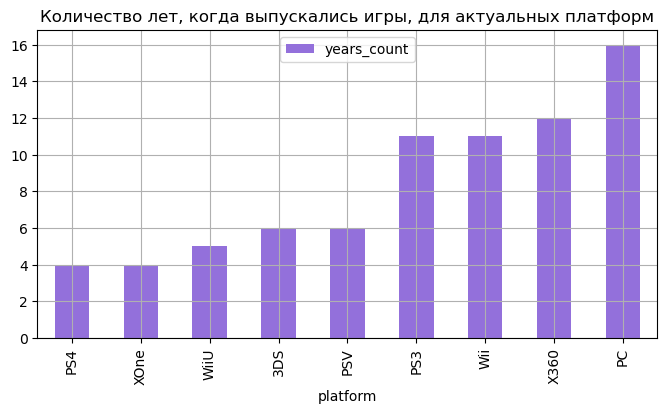

In [32]:
#строим график продолжительности жизни платформы по топ-9 платформ
best_platforms.groupby('platform').year_of_release.nunique().sort_values() \
    .plot(kind='bar', color='mediumpurple', grid=True, figsize=(8,4));
plt.legend(['years_count'], loc=9);
plt.title('Количество лет, когда выпускались игры, для актуальных платформ');

Заметно, что из актуальных платформ три уже подошли к предельному "возрасту" - это PlayStation3, XBox360 и Nintendo Wii. Пик у персонального компьютера опять же обусловлен постоянной модернизацией платформы.  
эти данные можно еще нагляднее увидеть на графике продаж по годам для каждой платформы:

/var/folders/6v/0vwd9g450k31l1j3q7c7b1b40000gn/T/ipykernel_53558/3877005612.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


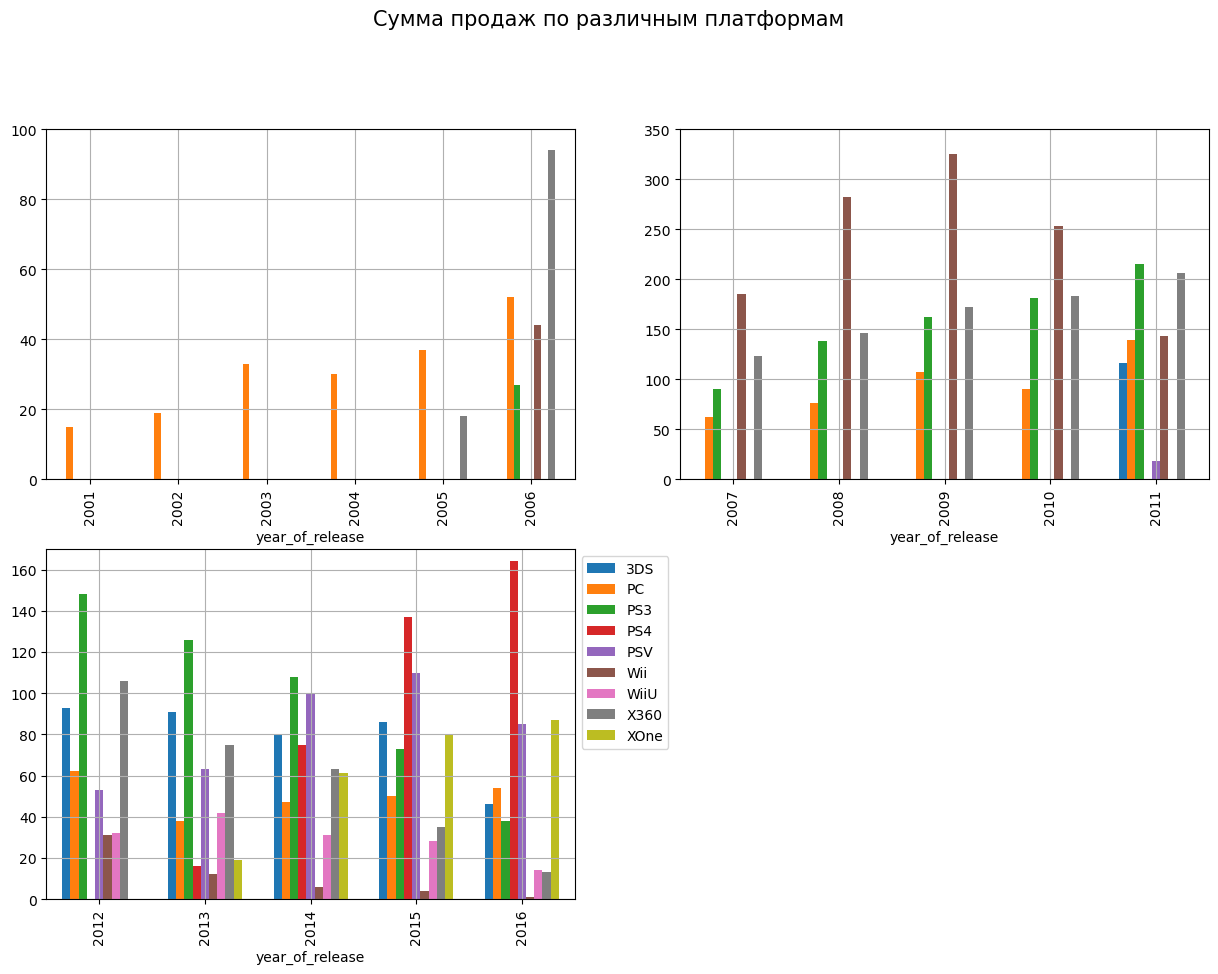

In [33]:
#строим график количества продаж по всем регионам в каждый год по топ-9 платформам
plt.subplots(figsize = (15, 10))
plt.suptitle('Сумма продаж по различным платформам',
             y = 1,
             fontsize = 15)
    # первый график
ax1 = plt.subplot(2, 2, 1)
best_platforms.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='count') \
    .plot(kind='bar', grid=True, ax = ax1, legend=False, width=0.7);
plt.xlim(-0.5,5.5);
plt.ylim(0,100);
    # второй график
ax2 = plt.subplot(2, 2, 2)
best_platforms.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='count') \
    .plot(kind='bar', grid=True, ax = ax2, legend=False, width=0.7);
plt.xlim(5.5,10.5);
plt.ylim(0,350);
    # третий график
ax2 = plt.subplot(2, 2, 3)
best_platforms.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='count') \
    .plot(kind='bar', grid=True, ax = ax2, width=0.7);
plt.xlim(10.5,15.5);
plt.ylim(0,170);
plt.legend(bbox_to_anchor=(1,1), loc='upper left');

**Представленная визуализация позволила сделать следующие выводы:**  
* за последние годы продажи для платформы PC были стабильны, без тенденции к снижению;  
* платформа PS4 сейчас наиболее популярна, является лидером продаж последние 2 года, к тому же она наряду с XOne является наиболее новой; 
* у портативных платформ PSV, 3DS и WiiU срок жизни отличается от стационарных игровых консолей - видны тенденции снижения продаж уже к пятому году после выпуска; 
* платформы, на замену которым пришли обновленные версии, еще два года сохраняют хороший уровень продаж (на примере PS3 и X360).

### Определение актуального временного периода и наиболее перспекивных платформ:

Учитывая изложенные выше доводы, определенные актуальные платформы, предлагается сузить временной отрезок рассмотрения до диапазона 2014-2016 год. В этот период представлены данные о продажах по всем интересующим платформам, новые и наиболее популярные на 2016 год консоли уже имеют стабильный показатель продаж в каждый из годов, а "покидающие" рынок платформы имеют низкий показатель продаж. Таким образом можно будтет получить максимально верную оценку без "перекосов".

In [34]:
#формируем датасет по ВСЕМ платформам только с 2014 по 2016 год
best_platforms_actually_years = best_platforms.query('year_of_release >= 2014')

Посмотрев на уровень продаж за последние годы, и учитывая тот факт, что необходимо происзвести анализ продаж для 2017 года, стоит оставить в рассмотрении наиболее активные платформы:  
1. PlayStation 4
2. XBox One
3. PC
4. PSV как единственная портативная консоль из представленных.

### Построение диаграммы размаха для выбранных платформ с данными о глобальных продажах игр:

Для выбранных к детальному исследованию платформ стоит оценить средний уровень продаж, стандартное отклоение, чтобы в дальнейшем понять ожидаемые продажи по ним в 2017 году. Можно визуализировать данные через диаграмму размаха, предварительно выведя на экран данные, по которым она построена:

In [35]:
#строим таблицу со средним, отклонением и квартилями
best_platforms_actually_years.query('platform == "PS4" or platform == "XOne" or platform == "PC" or platform == "PSV"') \
    .groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS4,376.0,0.766356,1.614970,0.01,0.0575,0.185,0.6900,14.63
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
XOne,228.0,0.615614,1.046512,0.01,0.0500,0.205,0.6325,7.39


/var/folders/6v/0vwd9g450k31l1j3q7c7b1b40000gn/T/ipykernel_53558/2697679256.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


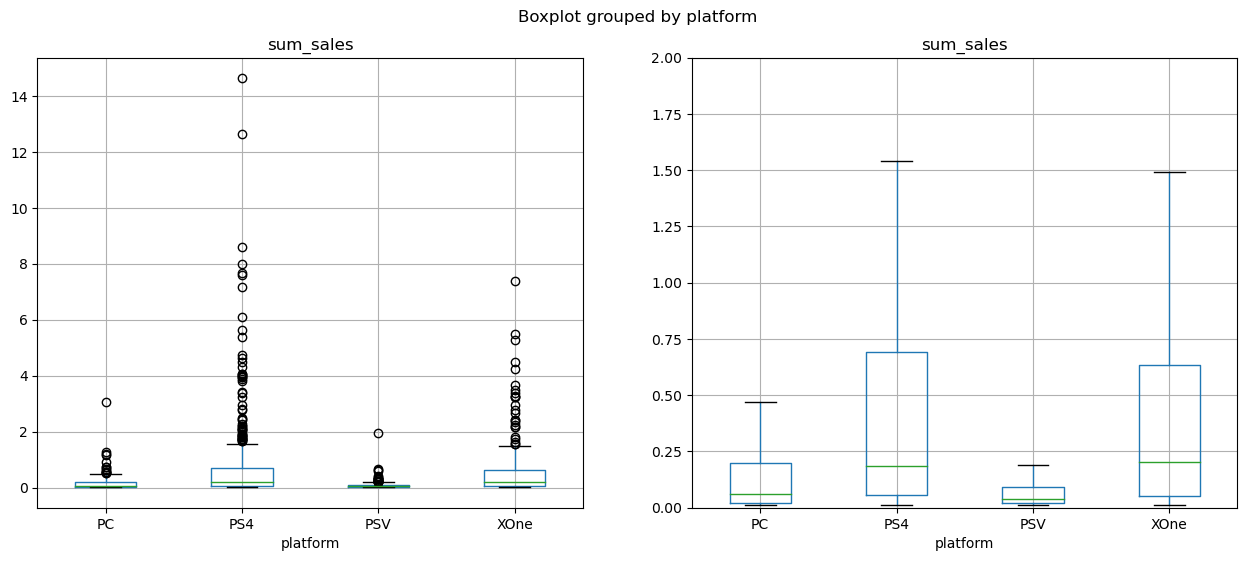

In [36]:
plt.subplots(figsize = (15,6))

#переводим таблицу выше в формат графика
ax1 = plt.subplot(1,2,1)
best_platforms_actually_years.query('platform == "PS4" or platform == "XOne" or platform == "PC" or platform == "PSV"') \
    .boxplot(column='sum_sales', by='platform', ax=ax1);
#добавим график в увеличенном масштабе
ax2 = plt.subplot(1,2,2)
best_platforms_actually_years.query('platform == "PS4" or platform == "XOne" or platform == "PC" or platform == "PSV"') \
    .boxplot(column='sum_sales', by='platform', showfliers=False, ax=ax2);
plt.ylim(0, 2);

Видны сильные выбросы - экстремально высокие показатели продаж - по консолям XBoxONE и PlayStation4. При этом плотность выбросов очень высока у верхней границы межквартильного размаха. Это говорит о том, что достаточно большое количество игр имеет высокий показатель продаж (выше среднего). При том, что средние значения у этих консолей близки, у PlayStation4 выбросы более плотные, и стандартное отклонение больше XBoxONE в 1,5 раза. Это говорит о том, что продаж по данной консоли значительно больше, и стоит рассмотреть ее более подробно, как самую популярную платформу.

### Проверка зависимости уровня продаж от оценок пользователей и критиков:

Стоит оценить, что влияет на высокий уровень продаж для самой популярной платформы. Для этого в первую очередь необходимо произвести расчеты зависимости глобального уровня продаж от оценки пользователей, а после - от оценки критиков.

In [37]:
#коэффициент корреляции между суммой продаж и оценкой пользователей для PS4
best_platforms_actually_years.query('platform == "PS4"')['sum_sales'] \
    .corr(best_platforms_actually_years.query('platform == "PS4"')['user_score'])

-0.04013158656330139

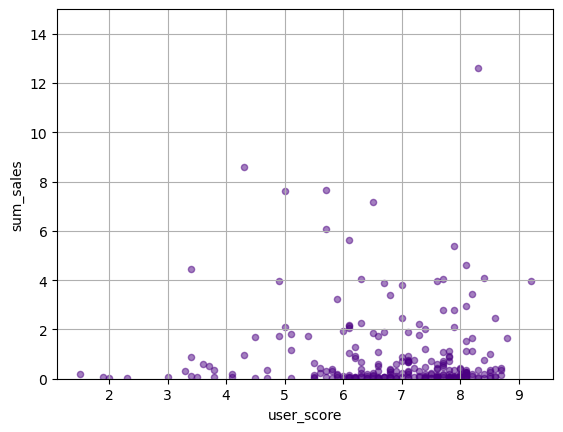

In [38]:
#график рассеивания для PS4 уровня продаж в зависимости от оценки пользователей
best_platforms_actually_years.query('platform == "PS4"') \
    .plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.5, color='indigo', grid=True);
plt.ylim(0,15);

Несмотря на очень слабую *обратную* зависимость, рассчитанную коэффициентом Пирсона, на графике рассеивания заметно увеличение высоты точек при увеличении рейтинга. Безусловно, игры с бОльшим пользовательским рейтингом имеют в какой-то мере лучшие продажи. Но однозначной сильной заивисимости нет. И разброс (рассеивание) показателей достаточно хаотично. Можно сделать вывод, что оценка пользователей ниже 6 баллов будет означать весьма скромные продажи.

In [39]:
#коэффициент корреляции между суммой продаж и оценкой критиков для PS4
best_platforms_actually_years.query('platform == "PS4"')['sum_sales'] \
    .corr(best_platforms_actually_years.query('platform == "PS4"')['critic_score'])

0.4026614096967974

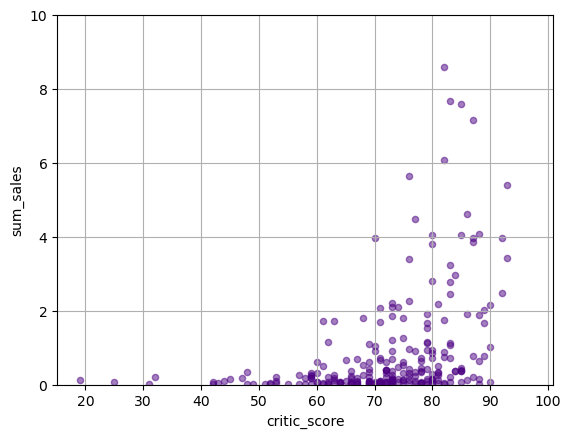

In [40]:
#график рассеивания для PS4 уровня продаж в зависимости от оценки критиков
best_platforms_actually_years.query('platform == "PS4"') \
    .plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.5, color='indigo', grid=True);
plt.ylim(0,10);

А вот график рассеивания по оценке критиков показывает более явную прямую зависимость. Видно явное увеличение количества продаж на отрезке оценок от 70 до 100. При этом рейтинг ниже 60 практически не влияет на количество продаж. О такой средней прямой заивсимости говорит и коэффициент Пирсона.

**Таким образом можно сформулировать вывод, что оценка пользователей выше 6 совершенно незначительно положительно и оценка критиков выше 70 средне-положительно влияют на уровень продаж.**

Стоит проверить это утверждение и на других платформах из выделенных лидеров. Возьмем XBoxOne и PC:

Зависимость продаж на платформе XOne от пользовательского рейтинга -0.07038393650888473
Зависимость продаж на платформе XOne от оценки критиков 0.4286769420078522


/var/folders/6v/0vwd9g450k31l1j3q7c7b1b40000gn/T/ipykernel_53558/609015625.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


Зависимость продаж на платформе PC от пользовательского рейтинга -0.07159666305470336
Зависимость продаж на платформе PC от оценки критиков 0.1746341296846939


/var/folders/6v/0vwd9g450k31l1j3q7c7b1b40000gn/T/ipykernel_53558/609015625.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


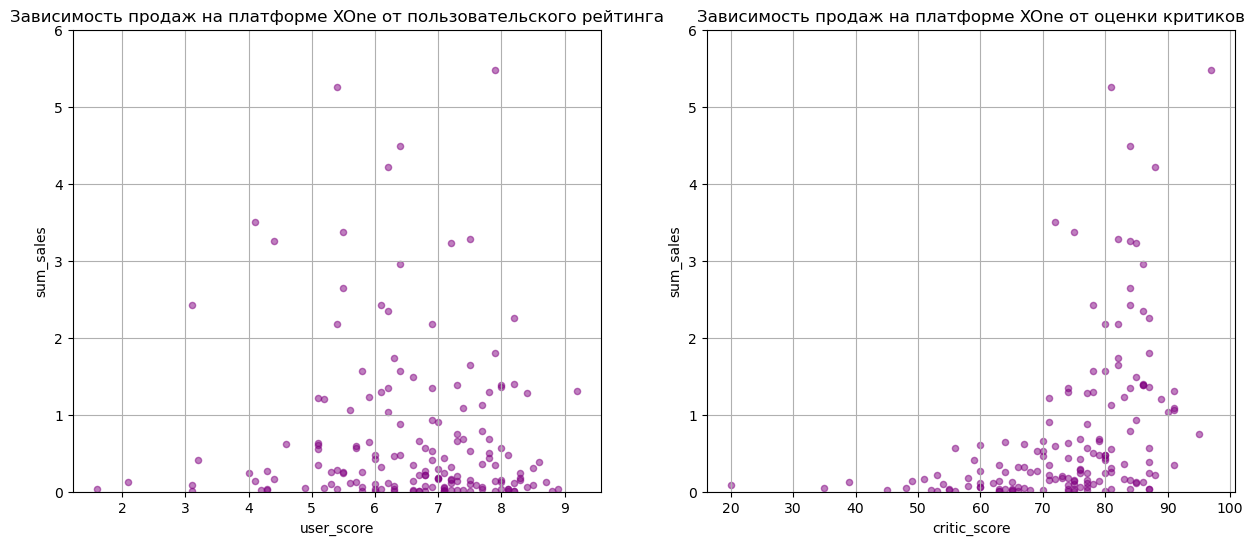

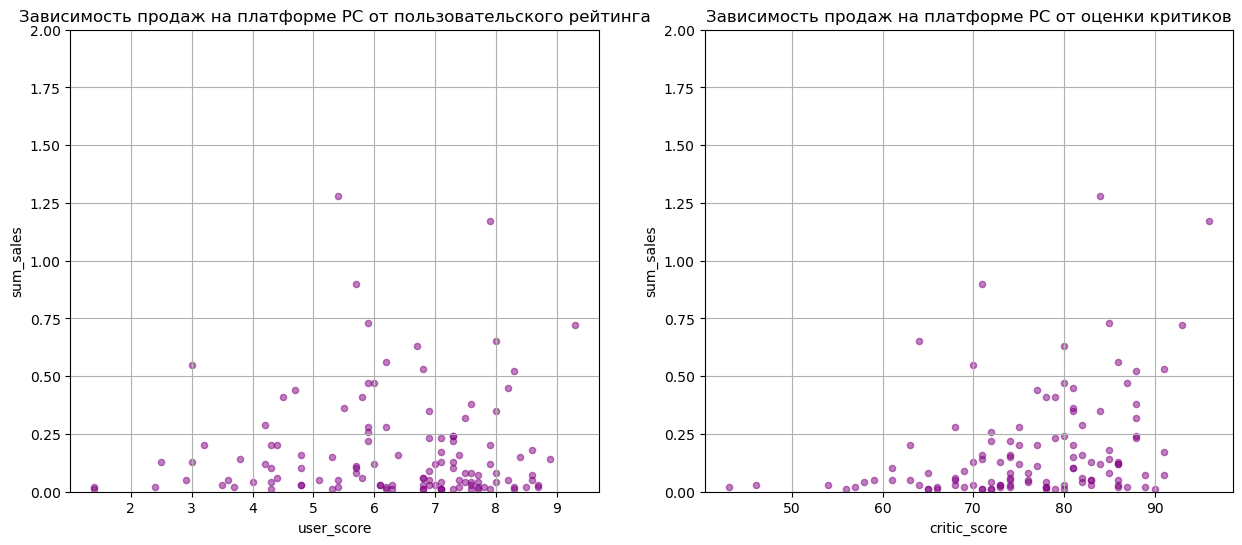

In [41]:
#коэффициент корреляции между суммой продаж и оценкой пользователей/критиков для XOne
print('Зависимость продаж на платформе XOne от пользовательского рейтинга', \
      best_platforms_actually_years.query('platform == "XOne"')['sum_sales'] \
      .corr(best_platforms_actually_years.query('platform == "XOne"')['user_score']))
print('Зависимость продаж на платформе XOne от оценки критиков', \
      best_platforms_actually_years.query('platform == "XOne"')['sum_sales'] \
      .corr(best_platforms_actually_years.query('platform == "XOne"')['critic_score']))
#графики рассеивания для Xone
plt.subplots(figsize=(15,6))
#продажи/пользовательский рейтинг
ax1 = plt.subplot(1,2,1)
best_platforms_actually_years.query('platform == "XOne"') \
    .plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.5, color='purple', grid=True, ax=ax1);
plt.ylim(0,6);
plt.title('Зависимость продаж на платформе XOne от пользовательского рейтинга');
#продажи/рейтинг от критиков
ax2 = plt.subplot(1,2,2)
best_platforms_actually_years.query('platform == "XOne"') \
    .plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.5, color='purple', grid=True, ax=ax2);
plt.ylim(0,6);
plt.title('Зависимость продаж на платформе XOne от оценки критиков');

#коэффициент корреляции между суммой продаж и оценкой пользователей/критиков для PC
print('Зависимость продаж на платформе PC от пользовательского рейтинга', \
      best_platforms_actually_years.query('platform == "PC"')['sum_sales'] \
      .corr(best_platforms_actually_years.query('platform == "PC"')['user_score']))
print('Зависимость продаж на платформе PC от оценки критиков', \
      best_platforms_actually_years.query('platform == "PC"')['sum_sales'] \
      .corr(best_platforms_actually_years.query('platform == "PC"')['critic_score']))
#графики рассеивания для PC
plt.subplots(figsize=(15,6))
#продажи/пользовательский рейтинг
ax1 = plt.subplot(1,2,1)
best_platforms_actually_years.query('platform == "PC"') \
    .plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.5, color='purple', grid=True, ax=ax1);
plt.ylim(0,2);
plt.title('Зависимость продаж на платформе PC от пользовательского рейтинга');
#продажи/рейтинг от критиков
ax2 = plt.subplot(1,2,2)
best_platforms_actually_years.query('platform == "PC"') \
    .plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.5, color='purple', grid=True, ax=ax2);
plt.ylim(0,2);
plt.title('Зависимость продаж на платформе PC от оценки критиков');

Расширив область рассмотрения до еще двух платформ, можно экстраполировать вышесказанный вывод для платформы XOne с небольшой корректировкой для пользовательского рейтинга: для этой платформы характерно минмиальное увеличение продаж при пользовательской оценке выше 5. Но зависимость настолько мала, что можно не опираться на эти наблдения в построении стратегий продаж.  
А вот данные для ПК отличаются: для этой платформы вообще не характерна даже средняя зависимость уровня продаж от пользовательского рейтинга или оценки критиков. Минимальный рост суммы продаж заметен уже от 4 баллов пользовательского рейтинга, а у оценки критиков есть небольшой всплеск после 80 баллов. Однако как видно по коэффициентам корреляции - опираться на эту зависимость также было бы неверно.

### Проверка зависимости уровня продаж от жанра игры:

Для прогноза продаж также можно проверить, влияет ли жанр на уровень продаж. Можно оценить количество игр в том или ином жанре, а после посмотреть на медианную сумму продаж в срезе жанров. Медианное значение используется по причине большого количества "выбросовых" экстремальных значений для популярных жанров. Поэтому с точки зрения корректной оценки правильнее взять медиану:

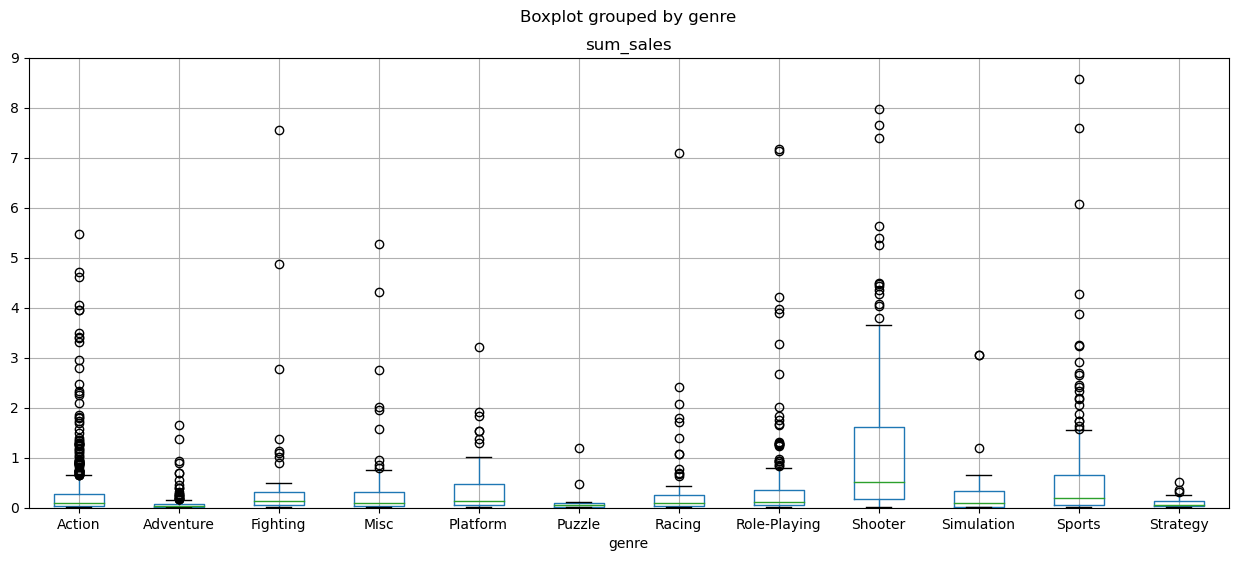

In [42]:
#покажем выбросы, чтобы обосновать использование медианного значения
best_platforms_actually_years.boxplot(column='sum_sales', by='genre', figsize=(15,6));
plt.ylim(0,9);

/var/folders/6v/0vwd9g450k31l1j3q7c7b1b40000gn/T/ipykernel_53558/1145167168.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


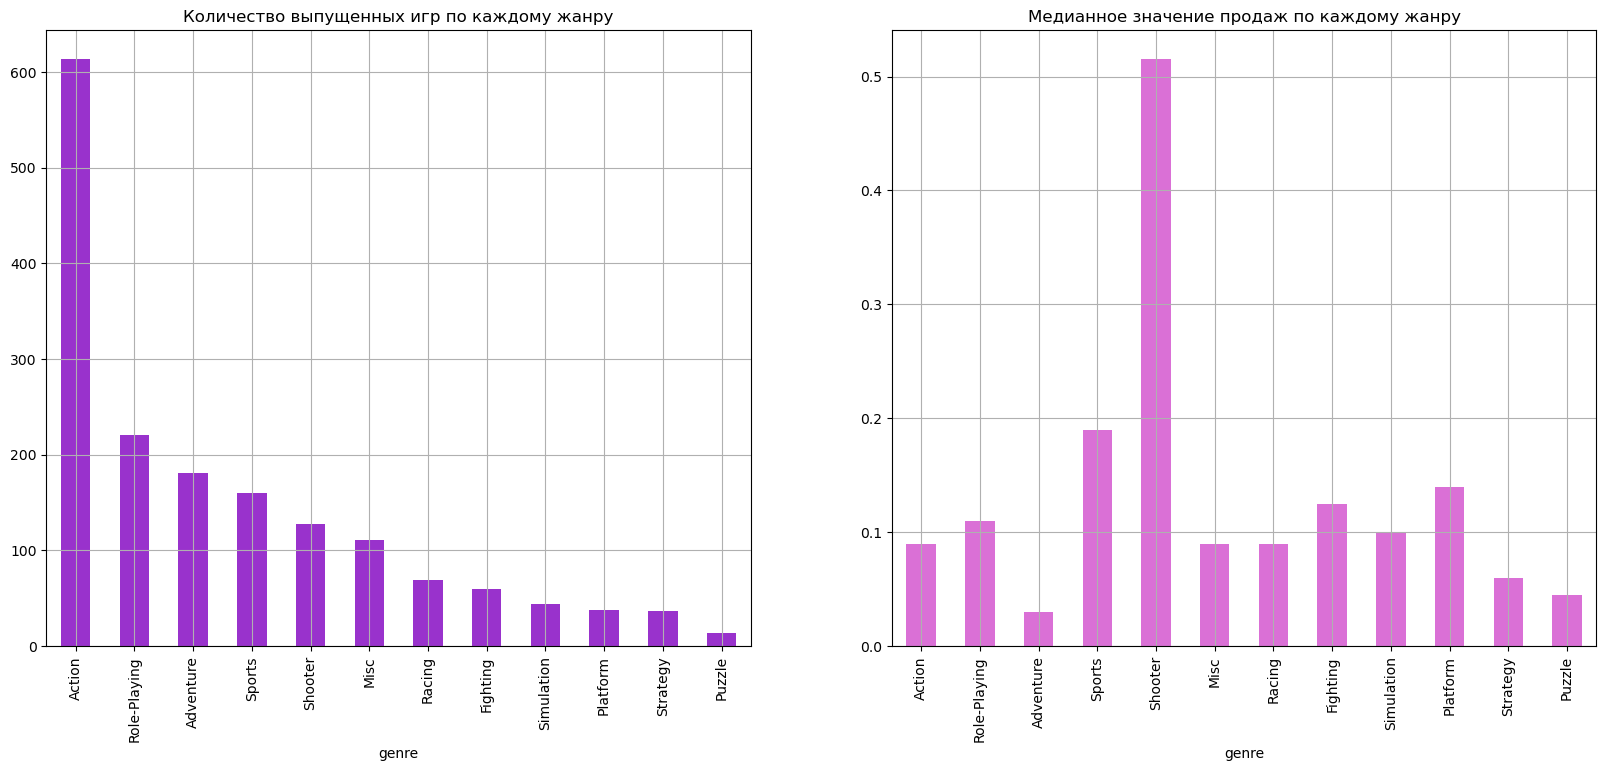

In [43]:
plt.subplots(figsize=(20,8))
#Построение графика количества продаж по каждому жанру
ax1 = plt.subplot(1,2,1)
best_platforms_actually_years.pivot_table(index='genre', values='sum_sales', aggfunc=('count', 'median')) \
    .sort_values(by='count', ascending=False)['count'] \
    .plot(kind='bar', color='darkorchid', grid=True, ax=ax1);
plt.title('Количество выпущенных игр по каждому жанру');
#Построение графика суммы продаж по каждому жанру
ax2 = plt.subplot(1,2,2)
best_platforms_actually_years.pivot_table(index='genre', values='sum_sales', aggfunc=('count', 'median')) \
    .sort_values(by='count', ascending=False)['median'] \
    .plot(kind='bar', color='orchid', grid=True, ax=ax2);
plt.title('Медианное значение продаж по каждому жанру');

По графикам видно, что наиболее часто-выпускаемым жанром является Экшн, следующая за ним позиция - ролевые игры, выпускается в 3 раза реже.  
Но при этом медианное значение продаж этих двух позиций много меньше лидера медианной суммы продажи - Шутеров.  
График медиан показывает, что наибольшая стоимость продаж как раз у Shooter, следом идут спортивные игры, и, удивительно, - Платформеры.
Сопоставив два графика можно сказать:  
1. Самым популярным жанром является Shooter. Даже при небольшом количестве выпускаемых игр, продажи идут с высоким спросом.
2. Хорошую среднюю позицию занимают Sports игры - их количество входит в топ-5 и медианные продажи находятся на втором месте.
3. Action игры занимают определенный высомый сегмент благодаря своему количеству, но медианные продажи таких игр невысоки. Однако в данном жанре больше всего "выстреливающих" игр с высокими продажами.
3. Явным остающим является жанр Puzzle - с небольшим количеством выпускаемых игр и низким количеством продаж.
4. Самой "дешевой" игрой являются приключения Adventure, но при этом количество выпускаемых игр замыкает топ-3 среди всех жанров.

### Промежуточный вывод:

На основании изученных данных, можно сформировать целевые показатели для будущей рекламной кампании:  
* Стоит рассматривать игры для PS4 и XBoxOne
* Стоит выбрать игру из списка жанров: Shooter как критерий самого высокого количества продаж, Action как самый выпускаемый жанр, или Sports, как компенсирующий перевесы двух других жанров.
* Предпочтение стоит отдать играм с оценкой критиков выше 70 баллов

## Составление портрета пользователя каждого региона

Необходимо оценить, какие платформы и игровые жанры популярны у пользователей разных регионов. А также проверить, как возрастной рейтинг влияет на уровень продаж.

### Определение топ-5 платформ для разных регионов

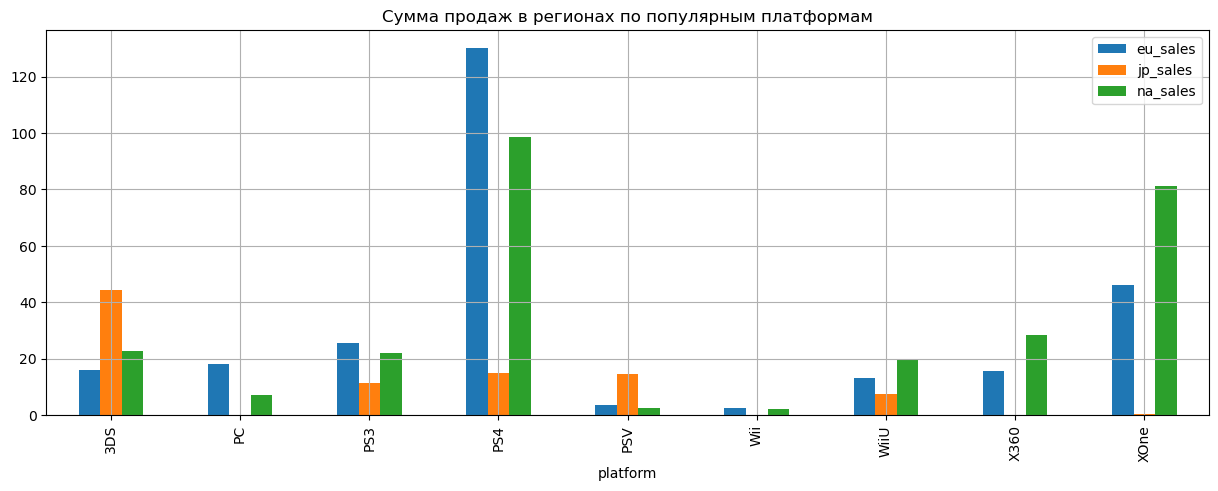

In [44]:
#построение графика суммы продаж в разных регионах по популярным платформам
best_platforms_actually_years.pivot_table(index='platform', values=('na_sales', 'jp_sales', 'eu_sales'), aggfunc='sum') \
    .plot(kind='bar', grid=True, figsize=(15,5));
plt.title('Сумма продаж в регионах по популярным платформам');

Ожидаемо яркие экстремумы видны для платформ PS4 и XBoxOne. Однако предпочтения по регионам разделились весьмв интересно:  

Пользователи из *Северной Америки* отдают максимальное предпочтение следующим платформам:  
1. PS4
2. XBoxOne
3. PS3
4. PC
5. XBox360  
  
Пользователи из *Европы* отдают максимальное предпочтение следующим платформам:  
1. PS4
2. XBoxOne
3. XBox360
4. Nintendo3DS
5. PS3  
  
Пользователи из *Японии* отдают максимальное предпочтение следующим платформам:  
1. Nintendo3DS
2. PS4
3. PSV
4. PS3
5. Nintendo WiiU

Среди игроманов в Северной Америке популярны самые известные консоли PlayStation и XBox, а также весьма распространены компьютерные игры для ПК. При этом PlayStation - неоспоримый лидер. Суммарные продажи по новой и старой версии консолей превышают продажи по двум консолям XBox.  
Европейцы же предпочитают PS и Xbox в равной степени, если просуммировать продажи по устаревающей и новой версиям консолей. При этом, в предпочтениях появилась портативная консоль 3DS.  
Японцы в этом сравнении могут выступить адептами портативных консолей. Лидером продаж в регионе восходящего солнца является платформа 3DS, и суммарные продажи для портативных платформ превышают суммарные продажи по платформам PS 3 и 4.  
Во многом, такое сильное отличие Японского рынка можно объяснить двумя локальными факторами: образ жизни (большую часть времени жители Японии проводят на работе), и жесткая игровая цензура. В Японии запрещено большое количество игр с пометкой 18+

### Определение топ-5 игровых жанров для разных регионов

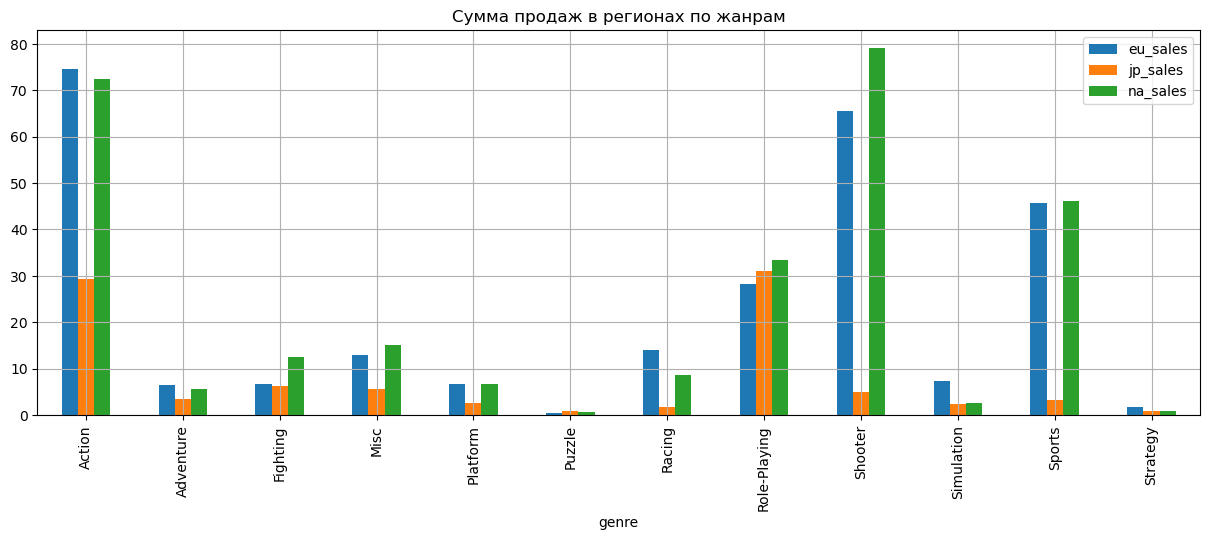

In [45]:
#построение графика суммы продаж в разных регионах по жанрам
best_platforms_actually_years.pivot_table(index='genre', values=('na_sales', 'jp_sales', 'eu_sales'), aggfunc='sum') \
    .plot(kind='bar', grid=True, figsize=(15,5));
plt.title('Сумма продаж в регионах по жанрам');

На графике опять же видна схожесть предпочтений пользователей из Северной Америки и Европы, и кардинальное отличие Японского рынка.  
  
Для Североамериканских игроманов можно выделить следующие топовые жанры:  
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

У Европейских пользователей список немного иной:  
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Misc

А для Японских игроков любимые жанры выглядят так:  
1. Role-Playing
2. Action
3. Fighting
4. Misc
5. Shooter

### Определение влияния возрастного рейтинга на продажи в разных регионах

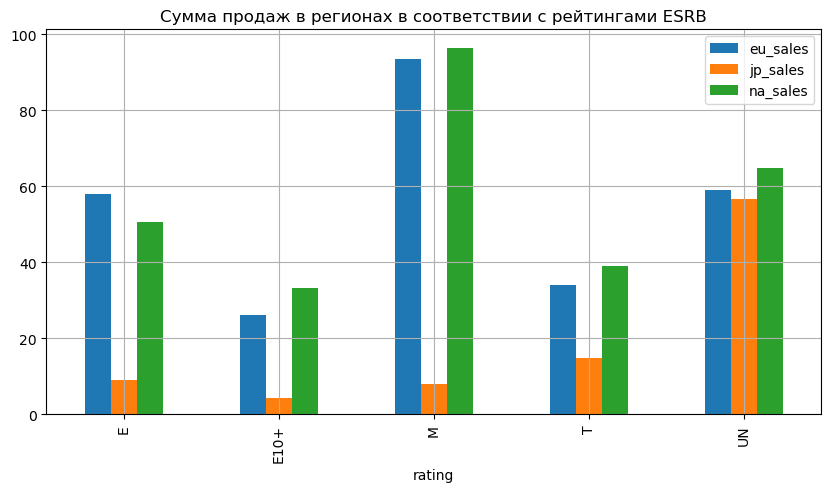

In [46]:
#построение графика суммы продаж в разных регионах по жанрам
best_platforms_actually_years.pivot_table(index='rating', values=('na_sales', 'jp_sales', 'eu_sales'), aggfunc='sum') \
    .plot(kind='bar', grid=True, figsize=(10,5));
plt.title('Сумма продаж в регионах в соответствии с рейтингами ESRB');

По представленному графику активно читается положительное влияние рейтинга M (17+) на продажи в Северной Америке и Европе.  
А вот для Японского рынка влияние рейтинга не характерно - уровень продаж с известным рейтингом имеет совершенно небольшие колебания, и максимальное количество игр было продано вообще без оценки ESRB. Такое отличие на Японском рынке объясняется наличием локального рейтингового агентства, на оценку которого ориентируется большинство Японских пользователей.

### Промежуточный вывод:

На основании проведенного анализа, можно сформировать усредненный портрет игромана каждого региона:  
* Североамериканский пользователь скорее всего будет играть в экшн-игру для лиц, старше 17 лет, на PlayStation 4
* Европейский пользователь предпочтет взрослый "шутер" также на PlayStation 4
* А Японский игрок наверняка играет в ролевую игру любого возрастного рейтинга или неустановленного на портативном Nintendo 3DS

## Проверка гипотез

Для понимания пользовательских предпочтений стоит расширить некоторые выводы глобально, а не только в рамках представленных данных. Это можно сделать с помощью проверки гипотез о соотношении средних значений. Так, стоит сравнить средние пользовательские рейтинги платформ Xbox One и PC.  
Будем формировать нулевые и альтернативные гипотезы для т-тестов канонически: нулевая гипотеза будет со знаком равно, альтернативная двухстороняя гипотеза - значения НЕ равны.
Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам будет применяться метод t-test_ind, так как значения в выборках (пользовательские рейтинги по разным платформам или жанрам) - независимые величины, стремящиеся к нормальному распределению.

Сформируем первую нулевую гипотезу: Пользовательские рейтинги платформ XBoxOne и PC равны. Альтернативная гипотеза: Пользовательские рейтинги платформ НЕ равны.

In [47]:
#введем переменные для выборок
xone_user_score = best_platforms_actually_years.query('platform == "XOne" and user_score > 0')['user_score']
pc_user_score = best_platforms_actually_years.query('platform == "PC" and user_score > 0')['user_score']

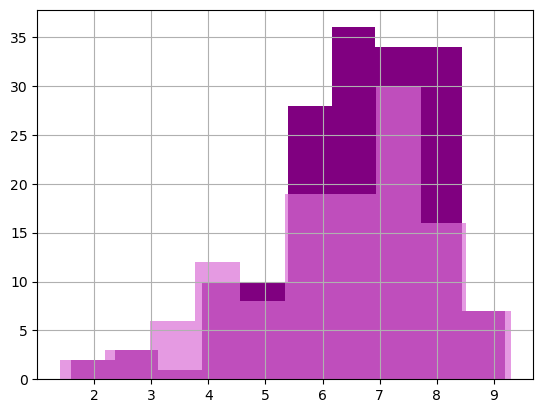

In [48]:
#проверим близость выборок к нормальному распределению
xone_user_score.hist(bins=10, color='purple');
pc_user_score.hist(bins=10, alpha=0.7, color='orchid');

Представленная выборка хоть и неидеально нормально-распределенная, однако имеет стремление. Значит применение метода исследования допустимо.

In [49]:
#проверка гипотезы
alpha = .01
print('Пороговое значение', alpha)
result = st.ttest_ind(
        xone_user_score,
        pc_user_score,
        equal_var = False)
print('P-значение', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Пороговое значение 0.01
P-значение 0.11601545900050317
Не удалось отвергнуть нулевую гипотезу


Т-тест показал, что вероятность получить неравные значения средних пользовательских рейтингов для XBox One и PC в выборках с таким же распределением, как представленные данные, выше 11%. Это достаточно высокое значение, поэтому однозначно сказать, что средний пользовательский рейтинг игр для этих платформ разнится - нельзя.  

Следующая метрика, интересная для изучения, пользовательские рейтинги в разрезе популярных жанров. Сравнению подлежат средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).  

Сформируем нулевую гипотезу: Средние пользовательские рейтинги для жанра Action и жанра Sports равны. Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [50]:
#введем переменные для выборок
action_user_score = best_platforms_actually_years.query('genre == "Action" and user_score > 0')['user_score']
sports_user_score = best_platforms_actually_years.query('genre == "Sports" and user_score > 0')['user_score']

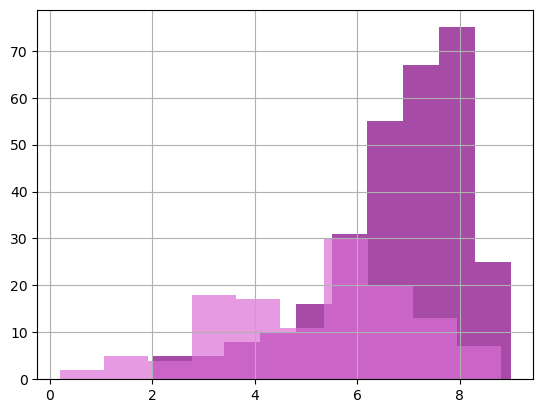

In [51]:
#проверим близость выборок к нормальному распределению
action_user_score.hist(bins=10, alpha=0.7, color='purple');
sports_user_score.hist(bins=10, alpha=0.7, color='orchid');

Вторая переменная с разбивкой по рейтингу для жанра Sports менее похожа на нормальное распределение. Однако размер выборки составляет более 100 значений, а значит допустимо использовать метод ttest_ind

In [52]:
#проверка гипотезы
alpha = .01
print('Пороговое значение', alpha)
result = st.ttest_ind(
        action_user_score,
        sports_user_score,
        equal_var = False)
print('P-значение', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Пороговое значение 0.01
P-значение 1.1825638224397033e-14
Отвергаем нулевую гипотезу


Полученный результат говорит о том, что средние пользовательские рейтинги не равны. Вероятность в одну статриллионную получить неравные значения средних в выборках при их равенстве на самом деле - очень ярко говорит об этом.  
Стоит оценить хотя бы примерно, в какую сторону идет перевес, для этого просто рассчитаем средние значения в выборке:

In [53]:
print('Средний пользовательский рейтинг для жанра Action', action_user_score.mean())
print('Средний пользовательский рейтинг для жанра Sports', sports_user_score.mean())

Средний пользовательский рейтинг для жанра Action 6.760606
Средний пользовательский рейтинг для жанра Sports 5.225197


В представленных данных рейтинг для Экшн-игр выше. Однако нельзя однозначно сказать, что Альтернативную гипотезу можно переименовать в "Средний пользовательский рейтинг Action больше Sports". Для этого необходимо провести дополнительные тесты.

### Промежуточные выводы:

Полученные результаты доказали, что с определенной вероятностью, средний пользовательский рейтинг игр на платформе XBox One будет равен среднему пользовательскому рейтингу для ПК. И наоборот, средний рейтинг Экшн-игр не равен рейтингу Спортивных игр.

## Общие выводы

Данное исследование имело цель выявить определяющие успешность игры закономерности, с целью построения рекламной кампании для магазина "Стримчик" на 2017 год.  
Обобщим все полученные итоги:

Для анализа использовались данные с 2014 по 2016 года.

1. Наиболее актуальными платформами выступают PlayStation 4 и XBox One. Их актуальность будет нарастать в 2017 году и сохраняться еще на протяжении 4-5 лет, до выхода на рынок обновленных версий этих платформ.  Наиболее стабильной платформой со средним уровнем продаж остается ПК. В среднем, удовлетвореннось пользователей от игр на платформах XOne и ПК одинакова.

2. Среди жанровых предпочтений у большинства пользователей лидируют Shooter, Sports и Action. При этом пользовательский рейтинг у Action будет больше Sports, поэтому упор стоит делать на Shooter и Action.

3. Наибольшую популярность будут иметь игры с международным возрастным рейтингом М (17+).

4. Оценка критиков от 70 баллов вызывает доверие пользователей и косвенно влияет на продажи.

5. Рынок Японии кардинально отличается поведением и предпочтением пользователей. Вышеуказанные заключения практически неприменимы для данного региона. При планировании кампании для японских игроков, стоит делать упор на портативные платформы - 3DS, ролевые игры Role-Playing, и не ориентироваться на возрастной рейтинг ESRB.